In [ ]:
# 09_R : 광고와 홍보

In [59]:
# 예측 분석 모델링 실무 기법
# 소스(원저자) - http://www.ftpress.com/promotions/modeling-techniques-in-predictive-analytics-139480
# 소스(역자) - http://blog.naver.com/skk1991/220238139920

In [60]:
# Traditional Conjoint Analysis

options(warn=-1)

In [62]:
#  user-defined function for spine chart
#load(file="09_data/prefer/mtpa_spine_chart.Rdata")

# spine chart accommodates up to 45 part-worths on one page
# |part-worth| <= 40 can be plotted directly on the spine chart
# |part-worths| > 40 can be accommodated through standardization

print.digits <- 2  # set number of digits on print and spine chart

In [64]:
library(support.CEs)  # package for survey construction

In [65]:
# generate a balanced set of product profiles for survey
provider.survey <- Lma.design(attribute.names = 
  list(brand = c("AT&T","T-Mobile","US Cellular","Verizon"), 
  startup = c("$100","$200","$300","$400"), 
  monthly = c("$100","$200","$300","$400"),
  service = c("4G NO","4G YES"), 
  retail = c("Retail NO","Retail YES"),
  apple = c("Apple NO","Apple YES"), 
  samsung = c("Samsung NO","Samsung YES"), 
  google = c("Nexus NO","Nexus YES")), nalternatives = 1, nblocks=1, seed=9999)
print(questionnaire(provider.survey))  # print survey design for review

The columns of the array have been used in order of appearance. 
For designs with relatively few columns, 
the properties can sometimes be substantially improved 
using option columns with min3 or even min34.




Block 1 
 
Question 1 
        alt.1       
brand   "AT&T"      
startup "$100"      
monthly "$100"      
service "4G NO"     
retail  "Retail NO" 
apple   "Apple NO"  
samsung "Samsung NO"
google  "Nexus NO"  

Question 2 
        alt.1        
brand   "Verizon"    
startup "$300"       
monthly "$100"       
service "4G NO"      
retail  "Retail YES" 
apple   "Apple YES"  
samsung "Samsung YES"
google  "Nexus NO"   

Question 3 
        alt.1        
brand   "US Cellular"
startup "$400"       
monthly "$200"       
service "4G NO"      
retail  "Retail NO"  
apple   "Apple NO"   
samsung "Samsung YES"
google  "Nexus NO"   

Question 4 
        alt.1       
brand   "Verizon"   
startup "$400"      
monthly "$400"      
service "4G YES"    
retail  "Retail YES"
apple   "Apple NO"  
samsung "Samsung NO"
google  "Nexus NO"  

Question 5 
        alt.1        
brand   "Verizon"    
startup "$200"       
monthly "$300"       
service "4G NO"      
retail  "Retail NO"  
apple   "Apple NO"

In [66]:
sink("09_data/prefer/questions_for_survey.txt")  # send survey to external text file
questionnaire(provider.survey)
sink() # send output back to the screen


Block 1 
 
Question 1 
        alt.1       
brand   "AT&T"      
startup "$100"      
monthly "$100"      
service "4G NO"     
retail  "Retail NO" 
apple   "Apple NO"  
samsung "Samsung NO"
google  "Nexus NO"  

Question 2 
        alt.1        
brand   "Verizon"    
startup "$300"       
monthly "$100"       
service "4G NO"      
retail  "Retail YES" 
apple   "Apple YES"  
samsung "Samsung YES"
google  "Nexus NO"   

Question 3 
        alt.1        
brand   "US Cellular"
startup "$400"       
monthly "$200"       
service "4G NO"      
retail  "Retail NO"  
apple   "Apple NO"   
samsung "Samsung YES"
google  "Nexus NO"   

Question 4 
        alt.1       
brand   "Verizon"   
startup "$400"      
monthly "$400"      
service "4G YES"    
retail  "Retail YES"
apple   "Apple NO"  
samsung "Samsung NO"
google  "Nexus NO"  

Question 5 
        alt.1        
brand   "Verizon"    
startup "$200"       
monthly "$300"       
service "4G NO"      
retail  "Retail NO"  
apple   "Apple NO"

In [85]:
# user-defined function for plotting descriptive attribute names 
effect.name.map <- function(effect.name) { 
  if(effect.name=="brand") return("Mobile Service Provider")
  if(effect.name=="startup") return("Start-up Cost")
  if(effect.name=="monthly") return("Monthly Cost")
  if(effect.name=="service") return("Offers 4G Service")
  if(effect.name=="retail") return("Has Nearby Retail Store")
  if(effect.name=="apple") return("Sells Apple Products")
  if(effect.name=="samsung") return("Sells Samsung Products")
  if(effect.name=="google") return("Sells Google/Nexus Products")
  }

In [86]:
# read in conjoint survey profiles with respondent ranks
conjoint.data.frame <- read.csv("09_data/prefer/mobile_services_ranking.csv")

In [87]:
# set up sum contrasts for effects coding as needed for conjoint analysis
options(contrasts=c("contr.sum","contr.poly"))

In [88]:
# fit linear regression model using main effects only (no interaction terms)
main.effects.model <- lm(ranking ~ brand + startup + monthly + service + 
  retail + apple + samsung + google, data=conjoint.data.frame)
print(summary(main.effects.model)) 


Call:
lm.default(formula = ranking ~ brand + startup + monthly + service + 
    retail + apple + samsung + google, data = conjoint.data.frame)

Residuals:
     1      2      3      4      5      6      7      8      9     10     11 
-0.125  0.125  0.125 -0.125 -0.125  0.125 -0.125  0.125  0.125 -0.125 -0.125 
    12     13     14     15     16 
-0.125  0.125  0.125  0.125 -0.125 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  8.500e+00  1.250e-01  68.000  0.00936 **
brand1       1.374e-16  2.165e-01   0.000  1.00000   
brand2      -2.500e-01  2.165e-01  -1.155  0.45437   
brand3      -1.202e-16  2.165e-01   0.000  1.00000   
startup1     7.500e-01  2.165e-01   3.464  0.17891   
startup2     8.240e-16  2.165e-01   0.000  1.00000   
startup3    -2.794e-16  2.165e-01   0.000  1.00000   
monthly1     5.000e+00  2.165e-01  23.094  0.02755 * 
monthly2     2.000e+00  2.165e-01   9.238  0.06865 . 
monthly3    -1.250e+00  2.165e-01  -5.774  0.10918   
service

In [89]:
# save key list elements of the fitted model as needed for conjoint measures
conjoint.results <- 
  main.effects.model[c("contrasts","xlevels","coefficients")]

In [90]:
conjoint.results$attributes <- names(conjoint.results$contrasts)

In [91]:
# compute and store part-worths in the conjoint.results list structure
part.worths <- conjoint.results$xlevels  # list of same structure as xlevels
end.index.for.coefficient <- 1  # intitialize skipping the intercept
part.worth.vector <- NULL # used for accumulation of part worths
for(index.for.attribute in seq(along=conjoint.results$contrasts)) {
  nlevels <- length(unlist(conjoint.results$xlevels[index.for.attribute]))
  begin.index.for.coefficient <- end.index.for.coefficient + 1
  end.index.for.coefficient <- begin.index.for.coefficient + nlevels -2
  last.part.worth <- -sum(conjoint.results$coefficients[
    begin.index.for.coefficient:end.index.for.coefficient])
  part.worths[index.for.attribute] <- 
    list(as.numeric(c(conjoint.results$coefficients[
      begin.index.for.coefficient:end.index.for.coefficient],
      last.part.worth)))
  part.worth.vector <- 
    c(part.worth.vector,unlist(part.worths[index.for.attribute]))    
  } 
conjoint.results$part.worths <- part.worths

In [92]:
# compute standardized part-worths
standardize <- function(x) {(x - mean(x)) / sd(x)}
conjoint.results$standardized.part.worths <- 
  lapply(conjoint.results$part.worths,standardize)

In [93]:
# compute and store part-worth ranges for each attribute 
part.worth.ranges <- conjoint.results$contrasts
for(index.for.attribute in seq(along=conjoint.results$contrasts)) 
  part.worth.ranges[index.for.attribute] <- 
  dist(range(conjoint.results$part.worths[index.for.attribute]))
conjoint.results$part.worth.ranges <- part.worth.ranges

In [94]:
sum.part.worth.ranges <- sum(as.numeric(conjoint.results$part.worth.ranges))

In [95]:
# compute and store importance values for each attribute 
attribute.importance <- conjoint.results$contrasts
for(index.for.attribute in seq(along=conjoint.results$contrasts)) 
  attribute.importance[index.for.attribute] <- 
  (dist(range(conjoint.results$part.worths[index.for.attribute]))/
  sum.part.worth.ranges) * 100
conjoint.results$attribute.importance <- attribute.importance

In [96]:
# data frame for ordering attribute names
attribute.name <- names(conjoint.results$contrasts)
attribute.importance <- as.numeric(attribute.importance)
temp.frame <- data.frame(attribute.name,attribute.importance)
conjoint.results$ordered.attributes <- 
  as.character(temp.frame[sort.list(
  temp.frame$attribute.importance,decreasing = TRUE),"attribute.name"])

In [97]:
# respondent internal consistency added to list structure
conjoint.results$internal.consistency <- summary(main.effects.model)$r.squared 

In [98]:
# user-defined function for printing conjoint measures
if (print.digits == 2) 
  pretty.print <- function(x) {sprintf("%1.2f",round(x,digits = 2))} 
if (print.digits == 3) 
  pretty.print <- function(x) {sprintf("%1.3f",round(x,digits = 3))} 

In [99]:
# report the conjoint measures to console 
# use pretty.print to provide nicely formated output
for(k in seq(along=conjoint.results$ordered.attributes)) {
  cat("\n","\n")
  cat(conjoint.results$ordered.attributes[k],"Levels: ",
  unlist(conjoint.results$xlevels[conjoint.results$ordered.attributes[k]]))
  
  cat("\n"," Part-Worths:  ")
  cat(pretty.print(unlist(conjoint.results$part.worths
    [conjoint.results$ordered.attributes[k]])))
    
  cat("\n"," Standardized Part-Worths:  ")
  cat(pretty.print(unlist(conjoint.results$standardized.part.worths
    [conjoint.results$ordered.attributes[k]])))  
    
  cat("\n"," Attribute Importance:  ")
  cat(pretty.print(unlist(conjoint.results$attribute.importance
    [conjoint.results$ordered.attributes[k]])))
  }


 
monthly Levels:  "$100" "$200" "$300" "$400"
  Part-Worths:  5.00 2.00 -1.25 -5.75
  Standardized Part-Worths:  1.09 0.43 -0.27 -1.25
  Attribute Importance:  51.19
 
service Levels:  "4G NO" "4G YES"
  Part-Worths:  -1.75 1.75
  Standardized Part-Worths:  -0.71 0.71
  Attribute Importance:  16.67
 
samsung Levels:  "Samsung NO" "Samsung YES"
  Part-Worths:  -1.12 1.12
  Standardized Part-Worths:  -0.71 0.71
  Attribute Importance:  10.71
 
google Levels:  "Nexus NO" "Nexus YES"
  Part-Worths:  -0.75 0.75
  Standardized Part-Worths:  -0.71 0.71
  Attribute Importance:  7.14
 
startup Levels:  "$100" "$200" "$300" "$400"
  Part-Worths:  0.75 0.00 -0.00 -0.75
  Standardized Part-Worths:  1.22 0.00 -0.00 -1.22
  Attribute Importance:  7.14
 
retail Levels:  "Retail NO" "Retail YES"
  Part-Worths:  0.25 -0.25
  Standardized Part-Worths:  0.71 -0.71
  Attribute Importance:  2.38
 
apple Levels:  "Apple NO" "Apple YES"
  Part-Worths:  0.25 -0.25
  Standardized Part-Worths:  0.71 -0.71
  A

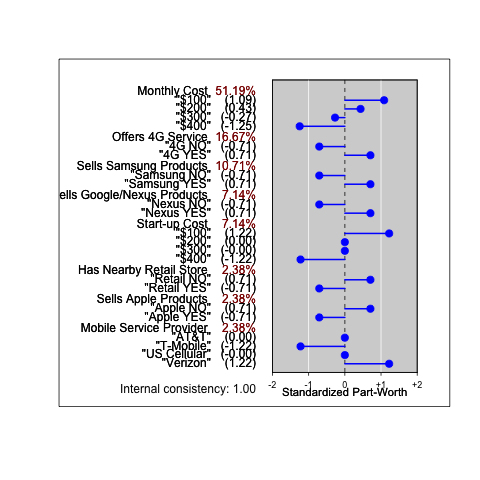

In [114]:
# plotting of spine chart begins here
# all graphical output is routed to external pdf file
#pdf(file = "09_data/prefer/fig_preference_mobile_services_results.pdf", width=8.5, height=11)
spine.chart(conjoint.results)
#dev.off()  # close the graphics output device

In [104]:
# Conjoint Analysis Spine Chart

# spine chart accommodates up to 45 part-worths on one page
# |part-worth| <= 40 can be plotted directly on the spine chart
# |part-worths| > 40 can be accommodated through standardization

print.digits <- 2  # set number of digits on print and spine chart

# user-defined function for printing conjoint measures
if (print.digits == 2) 
  pretty.print <- function(x) {sprintf("%1.2f",round(x,digits = 2))} 
if (print.digits == 3) 
  pretty.print <- function(x) {sprintf("%1.3f",round(x,digits = 3))} 
 
# --------------------------------------------------
# user-defined function for spine chart
# --------------------------------------------------
spine.chart <- function(conjoint.results,  
  color.for.part.worth.point = "blue",
  color.for.part.worth.line = "blue",
  left.side.symbol.to.print.around.part.worths = "(",
  right.side.symbol.to.print.around.part.worths = ")",
  left.side.symbol.to.print.around.importance = "",
  right.side.symbol.to.print.around.importance = "",
  color.for.printing.importance.text = "dark red",  
  color.for.printing.part.worth.text = "black",  
  draw.gray.background = TRUE,  
  draw.optional.grid.lines = TRUE,  
  print.internal.consistency = TRUE,  
  fix.max.to.4 = FALSE,  
  put.title.on.spine.chart = FALSE,
  title.on.spine.chart = paste("TITLE GOES HERE IF WE ASK FOR ONE",sep=""),
  plot.framing.box = TRUE,  
  do.standardization = TRUE,  
  do.ordered.attributes = TRUE) {

  # fix.max.to.4  option to override the range for part-worth plotting 
   
  if(!do.ordered.attributes) effect.names <- conjoint.results$attributes   
  if(do.ordered.attributes) effect.names <- 
    conjoint.results$ordered.attributes      
   
  number.of.levels.of.attribute <- NULL
  for(index.for.factor in seq(along=effect.names))
    number.of.levels.of.attribute <- c(number.of.levels.of.attribute,
      length(conjoint.results$xlevels[[effect.names[index.for.factor]]]))
    
  # total number of levels needed for vertical length of spine the spine plot
  total.number.of.levels <- sum(number.of.levels.of.attribute)

  # define size of spaces based upon the number of part-worth levels to plot
  if(total.number.of.levels <= 20) {
    smaller.space <- 0.01
    small.space <- 0.02
    medium.space <- 0.03
    large.space <- 0.04
    }

  if(total.number.of.levels > 20) {
    smaller.space <- 0.01 * 0.9
    small.space <- 0.02 * 0.9
    medium.space <- 0.03 * 0.9
    large.space <- 0.04 * 0.9
    }

  if(total.number.of.levels > 22) {
    smaller.space <- 0.01 * 0.85
    small.space <- 0.02 * 0.85
    medium.space <- 0.03 * 0.825
    large.space <- 0.04 * 0.8
    }

  if(total.number.of.levels > 25) {
    smaller.space <- 0.01 * 0.8
    small.space <- 0.02 * 0.8
    medium.space <- 0.03 * 0.75
    large.space <- 0.04 * 0.75
    }

  if(total.number.of.levels > 35) {
    smaller.space <- 0.01 * 0.65
    small.space <- 0.02 * 0.65
    medium.space <- 0.03 * 0.6
    large.space <- 0.04 * 0.6
    }
  
  # of course there is a limit to how much we can plot on one page  
  if (total.number.of.levels > 45) 
    stop("\n\nTERMINATED: More than 45 part-worths on spine chart\n")
 
  if(!do.standardization) 
    part.worth.plotting.list <- conjoint.results$part.worths
 
  if(do.standardization) 
    part.worth.plotting.list <- conjoint.results$standardized.part.worths 
  
  # check the range of part-worths to see which path to go down for plotting
  # initialize these toggles to start
  max.is.less.than.40 <- FALSE 
  max.is.less.than.20 <- FALSE
  max.is.less.than.10 <- FALSE
  max.is.less.than.4 <- FALSE
  max.is.less.than.2 <- FALSE
  max.is.less.than.1 <- FALSE 

  if (max(abs(min(unlist(part.worth.plotting.list),na.rm=TRUE)),
    max(unlist(part.worth.plotting.list),na.rm=TRUE)) <= 40) {
    max.is.less.than.40 <- TRUE 
    max.is.less.than.20 <- FALSE
    max.is.less.than.10 <- FALSE
    max.is.less.than.4 <- FALSE
    max.is.less.than.2 <- FALSE
    max.is.less.than.1 <- FALSE
    }  
  
  if (max(abs(min(unlist(part.worth.plotting.list),na.rm=TRUE)),
    max(unlist(part.worth.plotting.list),na.rm=TRUE)) <= 20) {
    max.is.less.than.40 <- FALSE 
    max.is.less.than.20 <- TRUE
    max.is.less.than.10 <- FALSE
    max.is.less.than.4 <- FALSE
    max.is.less.than.2 <- FALSE
    max.is.less.than.1 <- FALSE
    }

  if(max(abs(min(unlist(part.worth.plotting.list),na.rm=TRUE)),
    max(unlist(part.worth.plotting.list),na.rm=TRUE)) <= 10) {
    max.is.less.than.40 <- FALSE 
    max.is.less.than.20 <- FALSE
    max.is.less.than.10 <- TRUE
    max.is.less.than.4 <- FALSE
    max.is.less.than.2 <- FALSE
    max.is.less.than.1 <- FALSE
    }

  if (max(abs(min(unlist(part.worth.plotting.list),na.rm=TRUE)),
    max(unlist(part.worth.plotting.list),na.rm=TRUE)) <= 4) {
    max.is.less.than.40 <- FALSE 
    max.is.less.than.20 <- FALSE
    max.is.less.than.4 <- TRUE
    max.is.less.than.10 <- FALSE
    max.is.less.than.2 <- FALSE
    max.is.less.than.1 <- FALSE
    }
  
  if(max(abs(min(unlist(part.worth.plotting.list),na.rm=TRUE)),
    max(unlist(part.worth.plotting.list),na.rm=TRUE)) <= 2) {
    max.is.less.than.40 <- FALSE 
    max.is.less.than.20 <- FALSE
    max.is.less.than.4 <- FALSE
    max.is.less.than.10 <- FALSE
    max.is.less.than.2 <- TRUE
    max.is.less.than.1 <- FALSE
    }
 
  if(max(abs(min(unlist(part.worth.plotting.list),na.rm=TRUE)),
    max(unlist(part.worth.plotting.list),na.rm=TRUE)) <= 1) {
    max.is.less.than.40 <- FALSE 
    max.is.less.than.20 <- FALSE
    max.is.less.than.4 <- FALSE
    max.is.less.than.10 <- FALSE
    max.is.less.than.2 <- FALSE
    max.is.less.than.1 <- TRUE
    }

  # sometimes we override the range for part-worth plotting
  # this is not usually done... but it is an option
  if (fix.max.to.4) {
    max.is.less.than.40 <- FALSE 
    max.is.less.than.20 <- FALSE
    max.is.less.than.10 <- FALSE
    max.is.less.than.4 <- TRUE
    max.is.less.than.2 <- FALSE
    max.is.less.than.1 <- FALSE 
    }
  
  if (!max.is.less.than.1 & !max.is.less.than.2 & !max.is.less.than.4 & 
    !max.is.less.than.10 & !max.is.less.than.20 & !max.is.less.than.40) 
      stop("\n\nTERMINATED: Spine chart cannot plot |part-worth| > 40")

  # determine point positions for plotting part-worths on spine chart  
  if (max.is.less.than.1 | max.is.less.than.2 | max.is.less.than.4 | 
    max.is.less.than.10 | max.is.less.than.20 | max.is.less.than.40) {
  # begin if-block plotting when all part-worths in absolute value 
  # are less than one of the tested range values
  # part-worth positions for plottting 
  # end if-block plotting when all part-worths in absolute value 
  # are less than one of the tested range values
  # offsets for plotting vary with the max.is.less.than setting
    if(max.is.less.than.1) {
      list.scaling <- function(x) {0.75 + x/5}
      part.worth.point.position <- 
        lapply(part.worth.plotting.list,list.scaling)
      }

    if(max.is.less.than.2) {
      list.scaling <- function(x) {0.75 + x/10}
      part.worth.point.position <- 
        lapply(part.worth.plotting.list,list.scaling)
      }  
  
    if(max.is.less.than.4) {
      list.scaling <- function(x) {0.75 + x/20}
      part.worth.point.position <- 
        lapply(part.worth.plotting.list,list.scaling)
      }
    
     if(max.is.less.than.10) {
      list.scaling <- function(x) {0.75 + x/50}
      part.worth.point.position <- 
        lapply(part.worth.plotting.list,list.scaling)
      }
    
    if(max.is.less.than.20) {
      list.scaling <- function(x) {0.75 + x/100}
      part.worth.point.position <- 
        lapply(part.worth.plotting.list,list.scaling)
      }
    
    if(max.is.less.than.40) {
      list.scaling <- function(x) {0.75 + x/200}
      part.worth.point.position <- 
        lapply(part.worth.plotting.list,list.scaling)
      }
      
    part.worth.point.position <- lapply(part.worth.plotting.list,list.scaling)
    } 

  if (plot.framing.box) plot(c(0,0,1,1),c(0,1,0,1),xlab="",ylab="",
    type="n",xaxt="n",yaxt="n")

  if (!plot.framing.box) plot(c(0,0,1,1),c(0,1,0,1),xlab="",ylab="",
    type="n",xaxt="n",yaxt="n", bty="n")

  if (put.title.on.spine.chart) {
    text(c(0.50),c(0.975),pos=3,labels=title.on.spine.chart,cex=01.5)
    y.location <- 0.925  # starting position with title
    }

  if (!put.title.on.spine.chart) y.location <- 0.975  # no-title start 
  
  # store top of vertical line for later plotting needs
  y.top.of.vertical.line <- y.location 

  x.center.position <- 0.75  # horizontal position of spine

  # begin primary plotting loop 
  # think of a plot as a collection of text and symbols on screen or paper
  # we are going to construct a plot one text string and symbol at a time
  # (note that we may have to repeat this process at the end of the program)
  for(k in seq(along=effect.names)) { 
    y.location <- y.location - large.space
    text(c(0.4),c(y.location),pos=2,
      labels=paste(effect.name.map(effect.names[k])," ",sep=""),cex=01.0)
    text(c(0.525),c(y.location),pos=2,col=color.for.printing.importance.text,
    labels=paste(" ",left.side.symbol.to.print.around.importance,
    pretty.print(
      unlist(conjoint.results$attribute.importance[effect.names[k]])),"%",
      right.side.symbol.to.print.around.importance,sep=""),cex=01.0)

  # begin loop for printing part-worths
    for(m in seq(1:number.of.levels.of.attribute[k])) { 
      y.location <- y.location - medium.space
      text(c(0.4),c(y.location),pos=2,
      conjoint.results$xlevel[[effect.names[k]]][m],cex=01.0)
   #   part.worth.label.data.frame[k,m],cex=01.0)

      text(c(0.525),c(y.location),pos=2,
      col=color.for.printing.part.worth.text,
      labels=paste(" ",left.side.symbol.to.print.around.part.worths,
      pretty.print(part.worth.plotting.list[[effect.names[k]]][m]),
      right.side.symbol.to.print.around.part.worths,sep=""),cex=01.0)

      points(part.worth.point.position[[effect.names[k]]][m],y.location, 
        type = "p", pch = 20, col = color.for.part.worth.point, cex = 2)
      segments(x.center.position, y.location, 
      part.worth.point.position[[effect.names[k]]][m], y.location,
         col = color.for.part.worth.line, lty = 1, lwd = 2)      
      } 
    } 

  y.location <- y.location - medium.space

  # begin center axis and bottom plotting
  y.bottom.of.vertical.line <- y.location  # store top of vertical line

  below.y.bottom.of.vertical.line <- y.bottom.of.vertical.line - small.space/2

  if (!draw.gray.background) {
  # four optional grid lines may be drawn on the plot parallel to the spine
    if (draw.optional.grid.lines) {
      segments(0.55, y.top.of.vertical.line, 0.55, 
        y.bottom.of.vertical.line, col = "black", lty = "solid", lwd = 1)  

      segments(0.65, y.top.of.vertical.line, 0.65, 
        y.bottom.of.vertical.line, col = "gray", lty = "solid", lwd = 1)  
  
      segments(0.85, y.top.of.vertical.line, 0.85, 
        y.bottom.of.vertical.line, col = "gray", lty = "solid", lwd = 1)    

      segments(0.95, y.top.of.vertical.line, 0.95, 
        y.bottom.of.vertical.line, col = "black", lty = "solid", lwd = 1)  
      }
    }
       
  # gray background for plotting area of the points
  if (draw.gray.background) {
    rect(xleft = 0.55, ybottom = y.bottom.of.vertical.line, 
      xright = 0.95, ytop = y.top.of.vertical.line, density = -1, angle = 45,
      col = "light gray", border = NULL, lty = "solid", lwd = 1)
     
  # four optional grid lines may be drawn on the plot parallel to the spine
    if (draw.optional.grid.lines) {
      segments(0.55, y.top.of.vertical.line, 0.55, 
        y.bottom.of.vertical.line, col = "black", lty = "solid", lwd = 1)  

      segments(0.65, y.top.of.vertical.line, 0.65, 
        y.bottom.of.vertical.line, col = "white", lty = "solid", lwd = 1)  
  
      segments(0.85, y.top.of.vertical.line, 0.85, 
        y.bottom.of.vertical.line, col = "white", lty = "solid", lwd = 1)    

      segments(0.95, y.top.of.vertical.line, 0.95, 
        y.bottom.of.vertical.line, col = "black", lty = "solid", lwd = 1)  
      }     
    }   

  # draw the all-important spine on the plot
  segments(x.center.position, y.top.of.vertical.line, x.center.position, 
    y.bottom.of.vertical.line, col = "black", lty = "dashed", lwd = 1)  
       
  # horizontal line at top           
  segments(0.55, y.top.of.vertical.line, 0.95, y.top.of.vertical.line,
       col = "black", lty = 1, lwd = 1)      

  # horizontal line at bottom       
  segments(0.55, y.bottom.of.vertical.line, 0.95, y.bottom.of.vertical.line,
         col = "black", lty = 1, lwd = 1)          
       
  # plot for ticks and labels 
  segments(0.55, y.bottom.of.vertical.line, 
    0.55, below.y.bottom.of.vertical.line,
    col = "black", lty = 1, lwd = 1)   # tick line at bottom

  segments(0.65, y.bottom.of.vertical.line, 
    0.65, below.y.bottom.of.vertical.line,
    col = "black", lty = 1, lwd = 1)   # tick line at bottom
       
  segments(0.75, y.bottom.of.vertical.line, 
    0.75, below.y.bottom.of.vertical.line,
    col = "black", lty = 1, lwd = 1)   # tick line at bottom      

  segments(0.85, y.bottom.of.vertical.line, 
    0.85, below.y.bottom.of.vertical.line,
    col = "black", lty = 1, lwd = 1)   # tick line at bottom      
       
  segments(0.95, y.bottom.of.vertical.line, 
    0.95, below.y.bottom.of.vertical.line,
    col = "black", lty = 1, lwd = 1)   # tick line at bottom      
              
  # axis labels vary with the max.is.less.than range being used
  if (max.is.less.than.1) text(c(0.55,0.65,0.75,0.85,0.95),
    rep(below.y.bottom.of.vertical.line,times=5),
    pos=1,labels=c("-1","-0.5","0","+0.5","+1"),cex=0.75)

  if (max.is.less.than.2) text(c(0.55,0.65,0.75,0.85,0.95),
    rep(below.y.bottom.of.vertical.line,times=5),
    pos=1,labels=c("-2","-1","0","+1","+2"),cex=0.75)

  if (max.is.less.than.4) text(c(0.55,0.65,0.75,0.85,0.95),
    rep(below.y.bottom.of.vertical.line,times=5),
    pos=1,labels=c("-4","-2","0","+2","+4"),cex=0.75)

  if (max.is.less.than.10) text(c(0.55,0.65,0.75,0.85,0.95),
    rep(below.y.bottom.of.vertical.line,times=5),
    pos=1,labels=c("-10","-5","0","+5","+10"),cex=0.75)

  if (max.is.less.than.20) text(c(0.55,0.65,0.75,0.85,0.95),
    rep(below.y.bottom.of.vertical.line,times=5),
    pos=1,labels=c("-20","-10","0","+10","+20"),cex=0.75)

  if (max.is.less.than.40) text(c(0.55,0.65,0.75,0.85,0.95),
    rep(below.y.bottom.of.vertical.line,times=5),
    pos=1,labels=c("-40","-20","0","+20","+40"),cex=0.75)

  y.location <- below.y.bottom.of.vertical.line - small.space

  if(do.standardization) 
    text(.75,y.location,pos=1,labels=c("Standardized Part-Worth"),cex=0.95)
   
  if(!do.standardization) text(.75,y.location,pos=1,labels=c("Part-Worth"),
    cex=0.95)

  y.location <- below.y.bottom.of.vertical.line - small.space

  if(do.standardization) 
    text(0.75,y.location,pos=1,labels=c("Standardized Part-Worth"),cex=0.95)
   
  if(!do.standardization) text(0.75,y.location,pos=1,labels=c("Part-Worth"),
    cex=0.95) 

  if(print.internal.consistency) {
    y.location <- y.location - medium.space
    text(c(0.525),c(y.location),pos=2,labels=paste("Internal consistency: ",
    pretty.print(conjoint.results$internal.consistency),
    sep=""))
    }

  # if we have grid lines we may have plotted over part-worth points
  # if we have a gray background then we have plotted over part-worth points
  # so let us plot those all-important part-worth points and lines once again
  if(draw.gray.background || draw.optional.grid.lines) {
    y.location <- y.top.of.vertical.line  # retreive the starting value 

  # repeat the primary plotting loop 
  for(k in seq(along=effect.names)) { 
    y.location <- y.location - large.space
    text(c(0.4),c(y.location),pos=2,
      labels=paste(effect.name.map(effect.names[k])," ",sep=""),cex=01.0)
    text(c(0.525),c(y.location),pos=2,col=color.for.printing.importance.text,
      labels=paste(" ",left.side.symbol.to.print.around.importance,
      pretty.print(
      unlist(conjoint.results$attribute.importance[effect.names[k]])),"%",
      right.side.symbol.to.print.around.importance,sep=""),cex=01.0)

 # begin loop for printing part-worths
      for(m in seq(1:number.of.levels.of.attribute[k])) { 
         y.location <- y.location - medium.space
         text(c(0.4),c(y.location),pos=2,
         conjoint.results$xlevel[[effect.names[k]]][m],cex=01.0)

         text(c(0.525),c(y.location),
           pos=2,col=color.for.printing.part.worth.text,
           labels=paste(" ",left.side.symbol.to.print.around.part.worths,
           pretty.print(part.worth.plotting.list[[effect.names[k]]][m]),
           right.side.symbol.to.print.around.part.worths,sep=""),cex=01.0)

      points(part.worth.point.position[[effect.names[k]]][m],y.location, 
         type = "p", pch = 20, col = color.for.part.worth.point, cex = 2)
      segments(x.center.position, y.location, 
      part.worth.point.position[[effect.names[k]]][m], y.location,
         col = color.for.part.worth.line, lty = 1, lwd = 2)      
      } 
    } 
  } 
}